## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import Dropout

"""
建立神經網路，並加入 dropout layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.15, 0.25, 0.35, 0.5]

In [7]:
results = {}

for dropout_ratio in Dropout_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Dropout = %.6f" % (dropout_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=dropout_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-dropout-%s" % str(dropout_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


W0811 16:53:50.235877 16308 deprecation_wrapper.py:119] From C:\Users\an_fl\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0811 16:53:50.236875 16308 deprecation_wrapper.py:119] From C:\Users\an_fl\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0811 16:53:50.254865 16308 deprecation_wrapper.py:119] From C:\Users\an_fl\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0811 16:53:50.255826 16308 deprecation_wrapper.py:119] From C:\Users\an_fl\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0811 16:53:50.258826 16308 

Experiment with Dropout = 0.150000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128) 

50000/50000 [==============================] - 7s 143us/step - loss: 1.1731 - acc: 0.5810 - val_loss: 1.2893 - val_acc: 0.5390
Epoch 50/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.1705 - acc: 0.5829 - val_loss: 1.2883 - val_acc: 0.5360
Experiment with Dropout = 0.250000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256

50000/50000 [==============================] - 7s 148us/step - loss: 1.3004 - acc: 0.5352 - val_loss: 1.3231 - val_acc: 0.5210
Epoch 48/50
50000/50000 [==============================] - 8s 152us/step - loss: 1.2918 - acc: 0.5363 - val_loss: 1.3052 - val_acc: 0.5348
Epoch 49/50
50000/50000 [==============================] - 7s 147us/step - loss: 1.2857 - acc: 0.5407 - val_loss: 1.3108 - val_acc: 0.5255
Epoch 50/50
50000/50000 [==============================] - 7s 148us/step - loss: 1.2782 - acc: 0.5433 - val_loss: 1.2971 - val_acc: 0.5395
Experiment with Dropout = 0.350000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)      

50000/50000 [==============================] - 7s 139us/step - loss: 1.4259 - acc: 0.4935 - val_loss: 1.3695 - val_acc: 0.5120
Epoch 46/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.4185 - acc: 0.4929 - val_loss: 1.3673 - val_acc: 0.5161
Epoch 47/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.4127 - acc: 0.4951 - val_loss: 1.3719 - val_acc: 0.5071
Epoch 48/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.4103 - acc: 0.4949 - val_loss: 1.3601 - val_acc: 0.5134
Epoch 49/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.4067 - acc: 0.4975 - val_loss: 1.3546 - val_acc: 0.5147
Epoch 50/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.3992 - acc: 0.5020 - val_loss: 1.3490 - val_acc: 0.5196
Experiment with Dropout = 0.500000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (In

50000/50000 [==============================] - 7s 132us/step - loss: 1.6226 - acc: 0.4167 - val_loss: 1.4909 - val_acc: 0.4749
Epoch 44/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.6209 - acc: 0.4180 - val_loss: 1.4984 - val_acc: 0.4644
Epoch 45/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.6160 - acc: 0.4205 - val_loss: 1.4980 - val_acc: 0.4700
Epoch 46/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.6144 - acc: 0.4214 - val_loss: 1.4869 - val_acc: 0.4715
Epoch 47/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.6089 - acc: 0.4200 - val_loss: 1.4840 - val_acc: 0.4743
Epoch 48/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.6055 - acc: 0.4249 - val_loss: 1.4748 - val_acc: 0.4723
Epoch 49/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.5960 - acc: 0.4281 - val_loss: 1.4782 - val_acc: 0.4763
Epoch 50/50
50000/50000 [==============

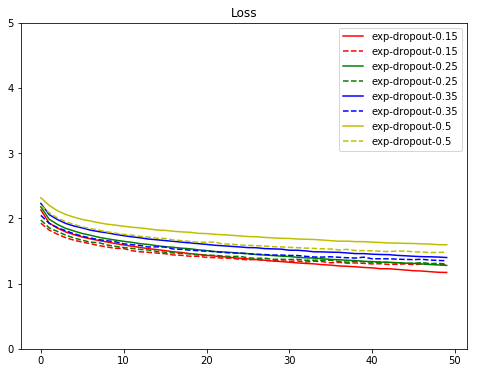

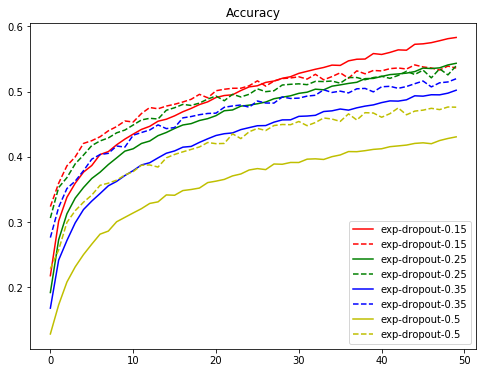

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()